In [1]:
pip install OSMPythonTools

Note: you may need to restart the kernel to use updated packages.


In [1]:
from OSMPythonTools.api import Api
api = Api()

In [2]:
names = []
attractions = []
websites = []
addresses = []

In [3]:
stateMuseum = api.query('relation/6268982')
names.append(stateMuseum.tag('name'))
attractions.append(stateMuseum.tag('tourism'))
websites.append(stateMuseum.tag('website'))
addresses.append(stateMuseum.tag('addr:housenumber') + " " +  stateMuseum.tag('addr:street') + ", " + stateMuseum.tag('addr:city') + " ," + stateMuseum.tag('addr:state'))

In [4]:
whiteRiver = api.query('way/113890743')
names.append(whiteRiver.tag('name'))
attractions.append(whiteRiver.tag('leisure'))
websites.append(whiteRiver.tag('source'))
addresses.append(addresses[len(addresses)-1])

In [5]:
motorSpeedway = api.query('way/589668075')
names.append(motorSpeedway.tag('name'))
attractions.append(motorSpeedway.tag('highway'))
websites.append(motorSpeedway.tag('website'))
motorSpeedwayTicket = api.query('way/388929550')
addresses.append(motorSpeedwayTicket.tag('addr:housenumber') + " " +  motorSpeedwayTicket.tag('addr:street') + ", " + motorSpeedwayTicket.tag('addr:city') + " ," + motorSpeedwayTicket.tag('addr:state'))


In [6]:
capitol = api.query('way/339985770')
names.append(capitol.tag('name'))
attractions.append(capitol.tag('addr:township'))
websites.append(capitol.tag('website'))
addresses.append(capitol.tag('addr:housenumber') + " " +  capitol.tag('addr:street') + ", " + capitol.tag('addr:city') + " ," + capitol.tag('addr:state'))


In [13]:
hoursPerAttraction = {'museum' : 2, 'park' : 3, 'zoo' : 5, 'memorial' : 1, 'center' : 1, 'raceway' : 2, 'stadium' : 2}
duration = []
for attraction in attractions:
    if attraction.lower() in hoursPerAttraction:
        duration.append(str(hoursPerAttraction[attraction.lower()]) + " hours") 


In [32]:
schedule = []
startTime = [9]
endTime = []
suffix = " AM"
for i in range(len(duration)):
    endTime.append(startTime[i] + int(duration[i][0]))
    if endTime[i] > 12:
        suffix = " PM"
        endTime[i] = endTime[i] % 12
    schedule.append(str(startTime[i]) + "-" + str(endTime[i]) + suffix)
    startTime.append(endTime[i] + 1)

In [29]:
import pandas as pd

data = pd.DataFrame({
    'Name of Attraction': names,
    'Attraction Type': attractions,
    'Website' : websites,
    'Address' : addresses,
    'Duration' : duration, 
    'Schedule' : schedule
})
data.to_csv('Indianapolis_Attractions.csv', index=False)

C:\Users\ayham\AppData\Local\Temp\ipykernel_50968\1256902000.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  schedule.set_xticklabels(['9', '10', '11', '12', '1', '2', '3', '4', '5', '6', '7', '8', '9'])


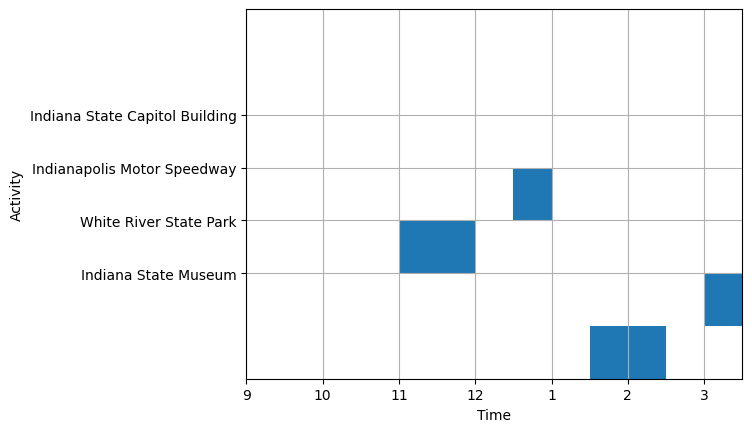

In [43]:
import matplotlib.pyplot as plt

fig, schedule = plt.subplots()
schedule.set_ylim(0, 7)
schedule.set_xlim(0, 13)
schedule.set_xlabel('Time')
schedule.set_ylabel('Activity')
schedule.set_yticks([2, 3, 4, 5])
schedule.set_yticklabels(names)
schedule.set_xticklabels(['9', '10', '11', '12', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
schedule.grid(True)
for i in range(len(duration)):
    schedule.broken_barh([(int(startTime[i]), int(duration[i][0]))], (i, 1))
plt.savefig("scheule.png")


